TO DO:

** Download BTC data from 2010 !!!
** Fit log regresion bands
** Get other indexes: RSI, from API ?

In [1]:
# By franciscoaiglesias@gmail.com - 2022
import pandas as pd
import binance
# Binance API, see https://python-binance.readthedocs.io/en/latest/
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pickle as pckl
import os
import datetime as dt
import matplotlib.dates as mdates


In [2]:
#Constants and initialization
repo_path = os.getcwd()
api_key_file = repo_path + '/../api_key/key.pickle'
klines_columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore'] # api klines labels

In [3]:
#API login and status
with open(api_key_file, 'rb') as handle:
    api_key, api_secret = pckl.load(handle)
client = Client(api_key, api_secret)
status = client.get_system_status()
print('Binance SERVER STATUS:', status['msg'])

Binance SERVER STATUS: normal


In [4]:
#List of trade symbols
exchange_info = client.get_exchange_info()
for s in exchange_info['symbols']:
    print(s['symbol'])

ETHBTC
LTCBTC
BNBBTC
NEOBTC
QTUMETH
EOSETH
SNTETH
BNTETH
BCCBTC
GASBTC
BNBETH
BTCUSDT
ETHUSDT
HSRBTC
OAXETH
DNTETH
MCOETH
ICNETH
MCOBTC
WTCBTC
WTCETH
LRCBTC
LRCETH
QTUMBTC
YOYOBTC
OMGBTC
OMGETH
ZRXBTC
ZRXETH
STRATBTC
STRATETH
SNGLSBTC
SNGLSETH
BQXBTC
BQXETH
KNCBTC
KNCETH
FUNBTC
FUNETH
SNMBTC
SNMETH
NEOETH
IOTABTC
IOTAETH
LINKBTC
LINKETH
XVGBTC
XVGETH
SALTBTC
SALTETH
MDABTC
MDAETH
MTLBTC
MTLETH
SUBBTC
SUBETH
EOSBTC
SNTBTC
ETCETH
ETCBTC
MTHBTC
MTHETH
ENGBTC
ENGETH
DNTBTC
ZECBTC
ZECETH
BNTBTC
ASTBTC
ASTETH
DASHBTC
DASHETH
OAXBTC
ICNBTC
BTGBTC
BTGETH
EVXBTC
EVXETH
REQBTC
REQETH
VIBBTC
VIBETH
HSRETH
TRXBTC
TRXETH
POWRBTC
POWRETH
ARKBTC
ARKETH
YOYOETH
XRPBTC
XRPETH
MODBTC
MODETH
ENJBTC
ENJETH
STORJBTC
STORJETH
BNBUSDT
VENBNB
YOYOBNB
POWRBNB
VENBTC
VENETH
KMDBTC
KMDETH
NULSBNB
RCNBTC
RCNETH
RCNBNB
NULSBTC
NULSETH
RDNBTC
RDNETH
RDNBNB
XMRBTC
XMRETH
DLTBNB
WTCBNB
DLTBTC
DLTETH
AMBBTC
AMBETH
AMBBNB
BCCETH
BCCUSDT
BCCBNB
BATBTC
BATETH
BATBNB
BCPTBTC
BCPTETH
BCPTBNB
ARNBTC
ARNETH
GVTBTC
GVTETH
CDT

In [5]:
# usr defined functions for fits, etc..
def func_log(date,p0,p1):
    return p0*np.log(date)+p1  

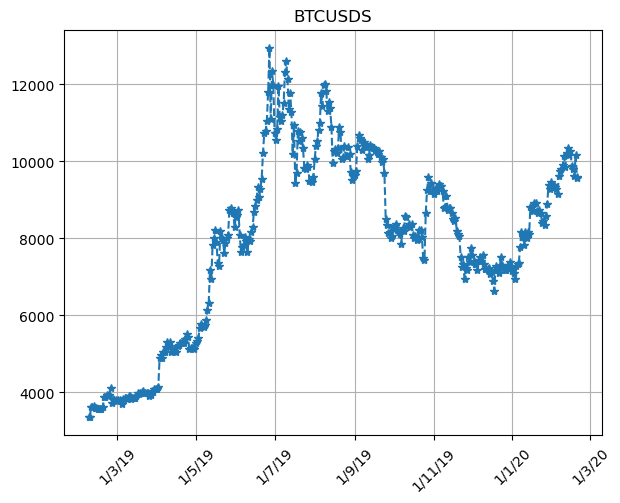

In [13]:
# Historical OHLCV
symbol = "BTCUSDS"
interval = '1d' # see for options https://python-binance.readthedocs.io/en/latest/constants.html
date_rage = ['1 Jan, 2013', '1 Jan, 2023']

kl = pd.DataFrame(client.get_historical_klines(symbol, interval, start_str=date_rage[0], end_str=date_rage[1]))
kl.columns = klines_columns
kl.index = [dt.datetime.fromtimestamp(x/1000.0) for x in kl.close_time]  # change the timestamp
kl = kl.astype(float)
plt.plot(kl.index, kl["close"], '--*', label='close')
plt.title(symbol)
ax = plt.gca()
plt.tight_layout()
plt.grid(True)
plt.xticks(rotation = 45)
monthyearFmt = mdates.DateFormatter('%-d/%-m/%-y')
ax.xaxis.set_major_formatter(monthyearFmt)

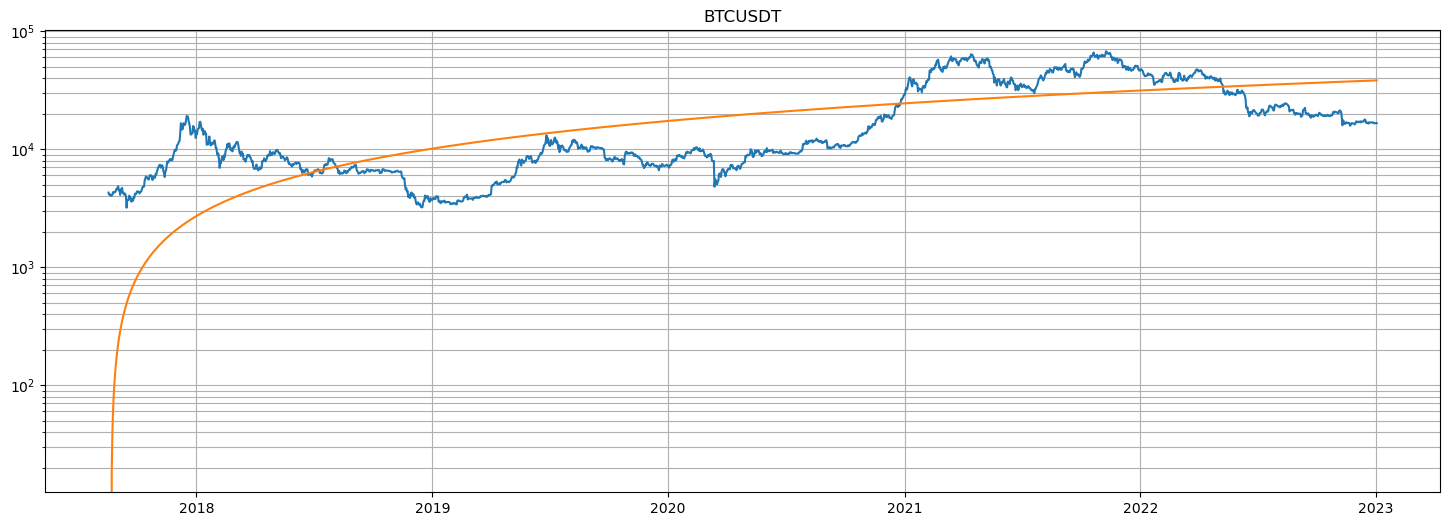

In [12]:
# fit log regresion to kl close price
optp, _ = curve_fit(func_log, kl.index.astype(int), kl['close'], p0=[1.,1.])
plt.figure(figsize=[18,6])
plt.plot(kl['close'])
plt.plot(kl.index, func_log(kl.index.astype(int),optp[0],optp[1]))
plt.yscale('log')
plt.grid('both', which='both')
plt.title(symbol)
plt.show()

In [8]:

# Returns i.e. percentage change in the adjusted close price and drop the first row with NA's
returns = adj_close.pct_change().dropna(axis=0)
# view the first 5 rows of the data frame
returns.head()

# Cumulative return series
cum_returns = ((1 + returns).cumprod() - 1) * 100
cum_returns.head()
cum_returns.plot(figsize=(20, 6))
plt.title('Cumulative Returns')


# compute the correlations
returns.corr()
# plot the correlations
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.show()


NameError: name 'adj_close' is not defined